<a href="https://colab.research.google.com/github/itimes-digital/use_cases_data_science/blob/main/Use_Case_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/CC%20GENERAL.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
#Maior comprador
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [8]:
#Maior saque do cartão
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


Visualização e exploração dos dados

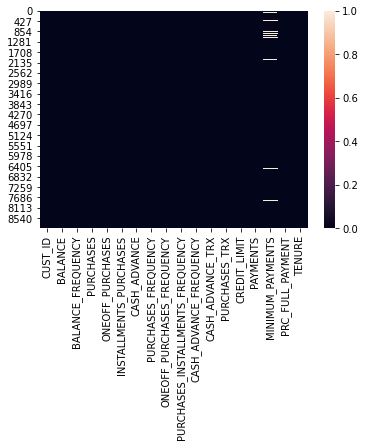

In [9]:
sns.heatmap(creditcard_df.isnull());

In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
creditcard_df['MINIMUM_PAYMENTS'].mean() 

864.2065423050814

In [12]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [13]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean() ;
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean();

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

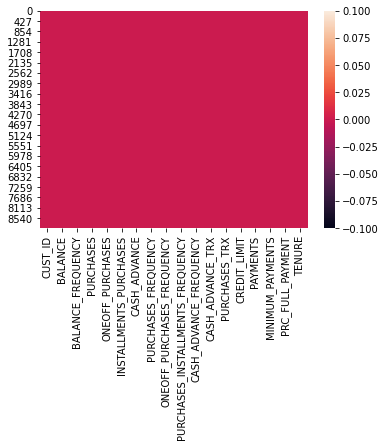

In [15]:
sns.heatmap(creditcard_df.isnull());

In [16]:
creditcard_df.duplicated().sum()

0

In [17]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True);

In [18]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
creditcard_df.columns, creditcard_df.columns.size

(Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
        'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
        'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
        'TENURE'],
       dtype='object'), 17)

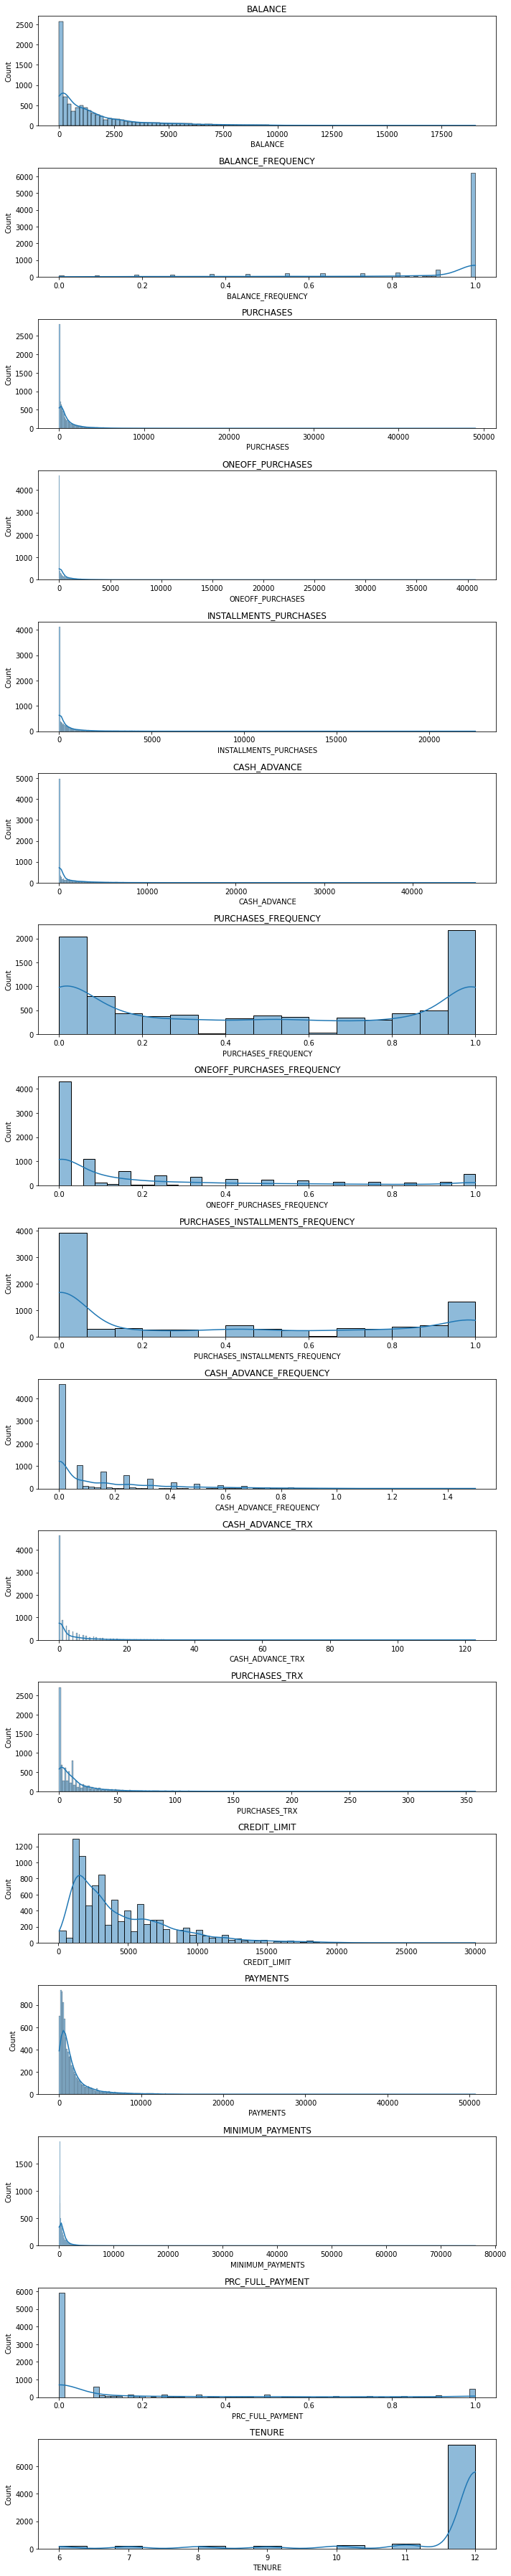

In [20]:
plt.figure(figsize= (10,50));
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1);
  sns.histplot(creditcard_df[creditcard_df.columns[i]], kde = True);
  plt.title(creditcard_df.columns[i]);

plt.tight_layout();

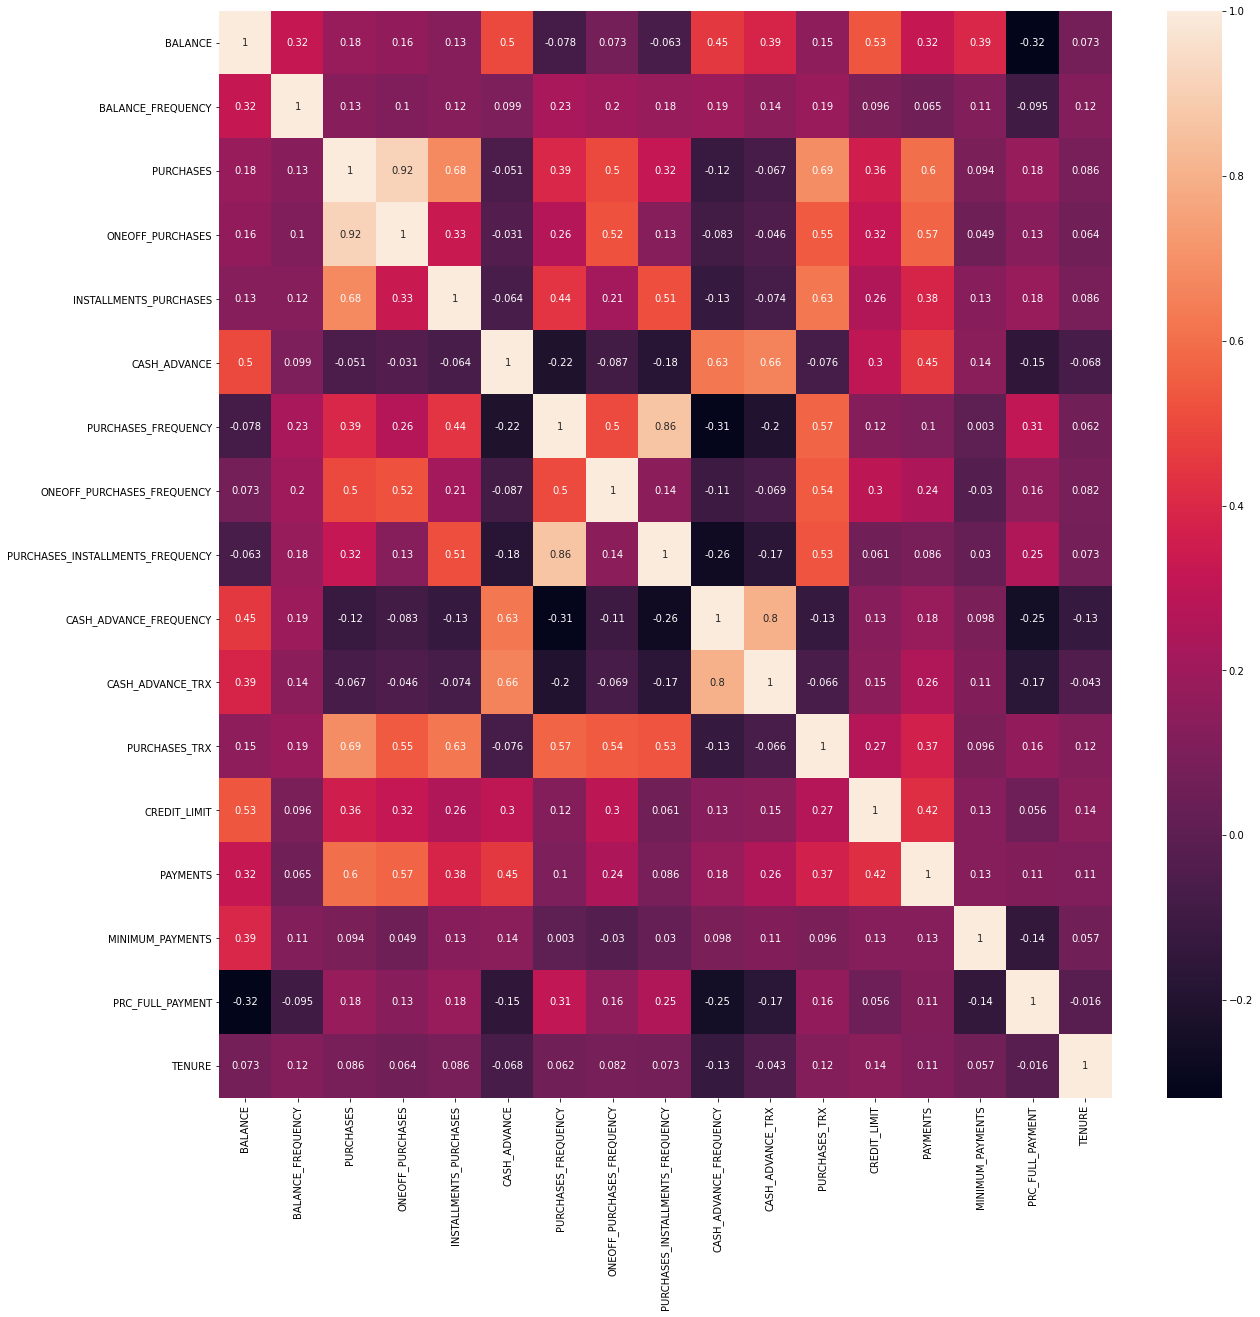

In [21]:
correlacao = creditcard_df.corr();

f, ax = plt.subplots(figsize = (20, 20));
sns.heatmap(correlacao, annot = True);

Elbow Method ou Dendrograma

In [24]:
#Precisa ser padronizado
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [25]:
scaler = StandardScaler() #Ideal para dados que tenham outliers
creditcard_df_scaled = scaler.fit_transform(creditcard_df);

In [26]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [27]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Cálculo de WCSS

In [28]:
wcss_1 = []

range_values = range(1,20);

for i in range_values:
  kmeans = KMeans(n_clusters=i);
  kmeans.fit(creditcard_df_scaled);
  wcss_1.append(kmeans.inertia_);

In [29]:
print(wcss_1)

[152150.00000000003, 127785.34016817786, 111986.6980661013, 99074.37049386371, 91502.59831526999, 84850.27216086029, 79528.41127723332, 74809.86882085592, 69858.61857815878, 67014.23181642484, 63658.27834478252, 61365.72243940653, 59144.84058972372, 57478.36441544811, 56216.8446833178, 54281.94157943409, 52995.134936709685, 51758.304521790815, 50680.496445403565]


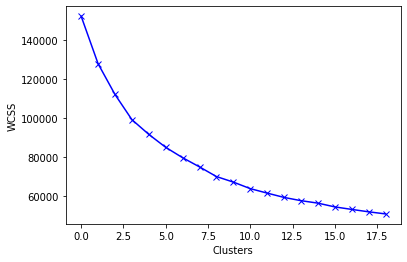

In [31]:
plt.plot(wcss_1, 'bx-');
plt.xlabel('Clusters');
plt.ylabel('WCSS');

Primeira análise tivemos 8 Clusters.

Análise com Dendrograma...

Agrupamento com K-means

In [34]:
kmeans = KMeans(n_clusters = 8);
kmeans.fit(creditcard_df_scaled);
labels = kmeans.labels_

In [36]:
labels, len(labels)

(array([0, 2, 6, ..., 3, 3, 3], dtype=int32), 8950)

In [37]:
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2828, 2042,  881,  628,   36,   80, 1268, 1187]))

In [40]:
kmeans.cluster_centers_

array([[ 8.29401925e-03,  4.02277328e-01, -3.44108818e-01,
        -2.25039867e-01, -4.00092666e-01, -1.02151815e-01,
        -8.12262817e-01, -3.35185442e-01, -7.55241959e-01,
         8.81749435e-02, -3.95202967e-02, -4.65665657e-01,
        -2.99188895e-01, -2.47253594e-01, -4.41676756e-02,
        -4.51879305e-01,  2.71867009e-01],
       [-3.78770394e-01,  3.30662380e-01, -4.25989418e-02,
        -2.32462140e-01,  3.26183306e-01, -3.68677729e-01,
         9.75950723e-01, -3.50988537e-01,  1.16583384e+00,
        -4.77804233e-01, -3.62974516e-01,  1.65407877e-01,
        -2.76688769e-01, -2.25410524e-01, -9.68380710e-02,
         3.09925991e-01,  2.52362507e-01],
       [ 1.65517583e+00,  3.91982829e-01, -2.01624874e-01,
        -1.46928795e-01, -2.06889629e-01,  2.01054976e+00,
        -4.52121221e-01, -1.84446301e-01, -4.01429664e-01,
         1.93365453e+00,  1.94568155e+00, -2.35604907e-01,
         1.01310465e+00,  8.46590623e-01,  3.90312659e-01,
        -3.88854704e-01,  6.7

In [41]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008294,0.402277,-0.344109,-0.225040,-0.400093,-0.102152,-0.812263,-0.335185,-0.755242,0.088175,-0.039520,-0.465666,-0.299189,-0.247254,-0.044168,-0.451879,0.271867
1,-0.378770,0.330662,-0.042599,-0.232462,0.326183,-0.368678,0.975951,-0.350989,1.165834,-0.477804,-0.362975,0.165408,-0.276689,-0.225411,-0.096838,0.309926,0.252363
2,1.655176,0.391983,-0.201625,-0.146929,-0.206890,2.010550,-0.452121,-0.184446,-0.401430,1.933655,1.945682,-0.235605,1.013105,0.846591,0.390313,-0.388855,0.067211
3,-0.334843,-0.343573,-0.284231,-0.208737,-0.288211,0.065686,-0.197106,-0.271926,-0.229662,0.304677,-0.001695,-0.385258,-0.557568,-0.390390,-0.209717,0.013756,-3.194665
4,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004964,-0.129901,11.641856,-0.525551,0.298409
5,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
6,0.141590,0.430033,0.952627,0.902258,0.594847,-0.306508,1.095226,1.870530,0.540429,-0.407110,-0.316822,1.208524,0.709215,0.399321,-0.047060,0.456333,0.307642
7,-0.701914,-2.135202,-0.307061,-0.230399,-0.302643,-0.322829,-0.547706,-0.428162,-0.441853,-0.521852,-0.376776,-0.416715,-0.172708,-0.202070,-0.257337,0.294319,0.198400


In [42]:
cluster_centers = scaler.inverse_transform(cluster_centers);

In [44]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1581.738129,0.972567,268.011040,218.917283,49.268811,764.653985,0.164350,0.102465,0.064285,0.152789,2.979130,3.135126,3405.877845,1017.368925,761.275637,2.154770e-02,11.881146
1,776.096225,0.955602,912.191538,206.597831,706.031161,205.736693,0.882047,0.097751,0.827770,0.039531,0.771792,18.821254,3487.742508,1080.602472,638.529503,2.443627e-01,11.855044
2,5009.583594,0.970128,572.430182,348.565664,223.979921,5195.087884,0.308892,0.147434,0.204899,0.522088,16.526674,8.853575,8180.538644,4183.940754,1773.813729,3.998131e-02,11.607264
3,867.527490,0.795881,395.941226,245.976624,150.442309,1116.616899,0.411243,0.121337,0.273164,0.196113,3.237261,5.133758,2465.787340,603.004456,375.470865,1.577381e-01,7.242038
4,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,-5.551115e-17,11.916667
5,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,4.066166e-01,11.962500
6,1859.183462,0.979142,3038.508099,2090.000844,948.980442,336.110517,0.929918,0.760473,0.579218,0.053677,1.086751,44.749211,7074.863780,2889.137799,754.535452,2.871843e-01,11.929022
7,103.500064,0.371461,347.163889,210.022694,137.391027,301.884228,0.270530,0.074729,0.188834,0.030716,0.677609,4.351852,3866.068556,1148.172186,264.493843,2.397980e-01,11.782828


In [47]:
creditcard_df_cluster = pd.concat([pd.DataFrame({'cluster': labels}), creditcard_df], axis = 1)
creditcard_df_cluster.head()

,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,2,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,6,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,0,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,0,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


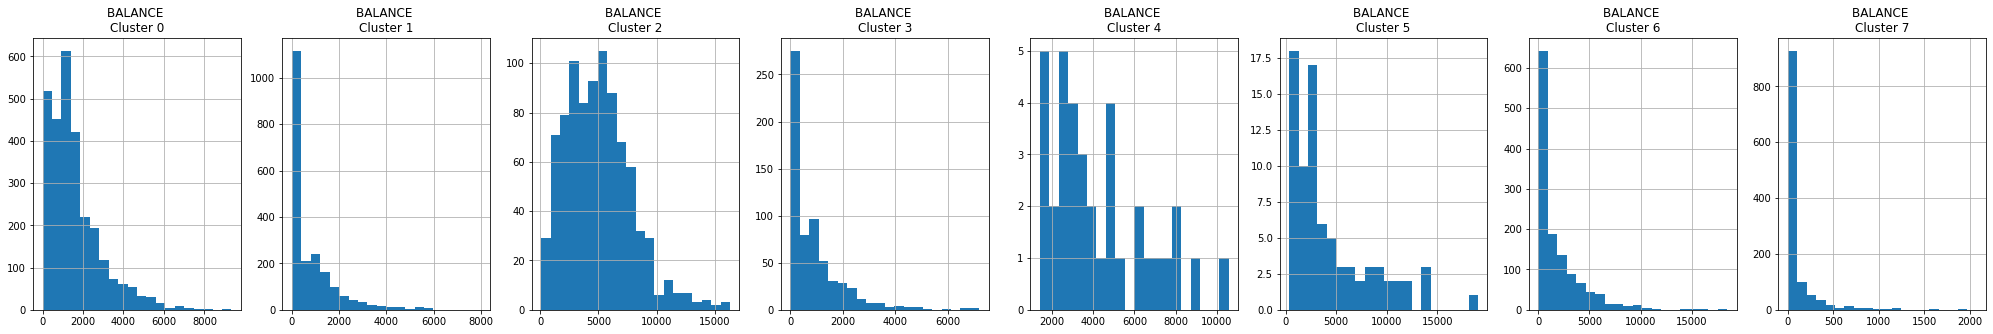

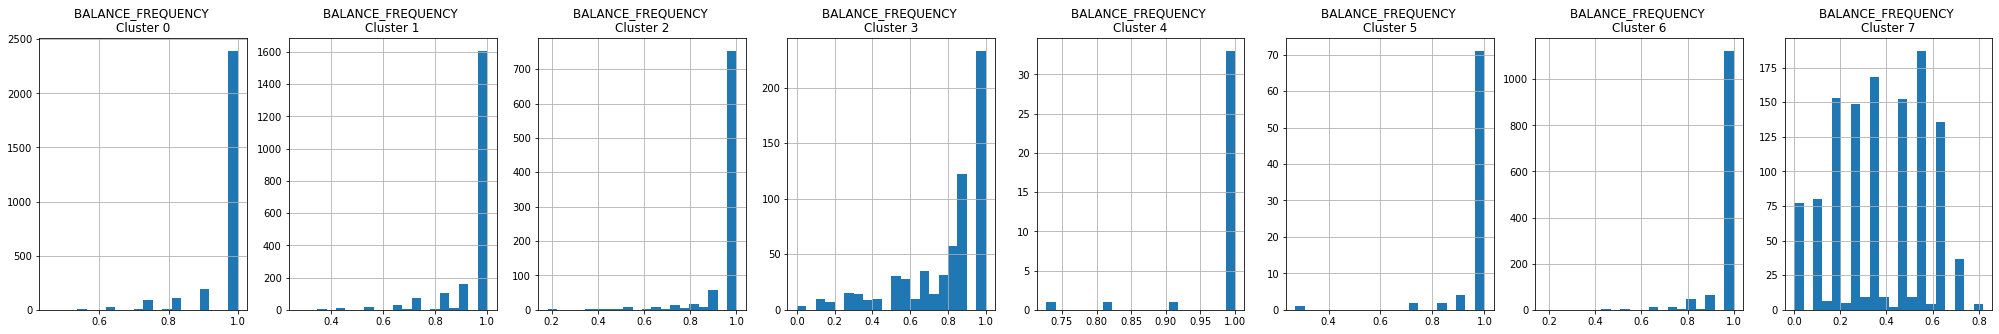

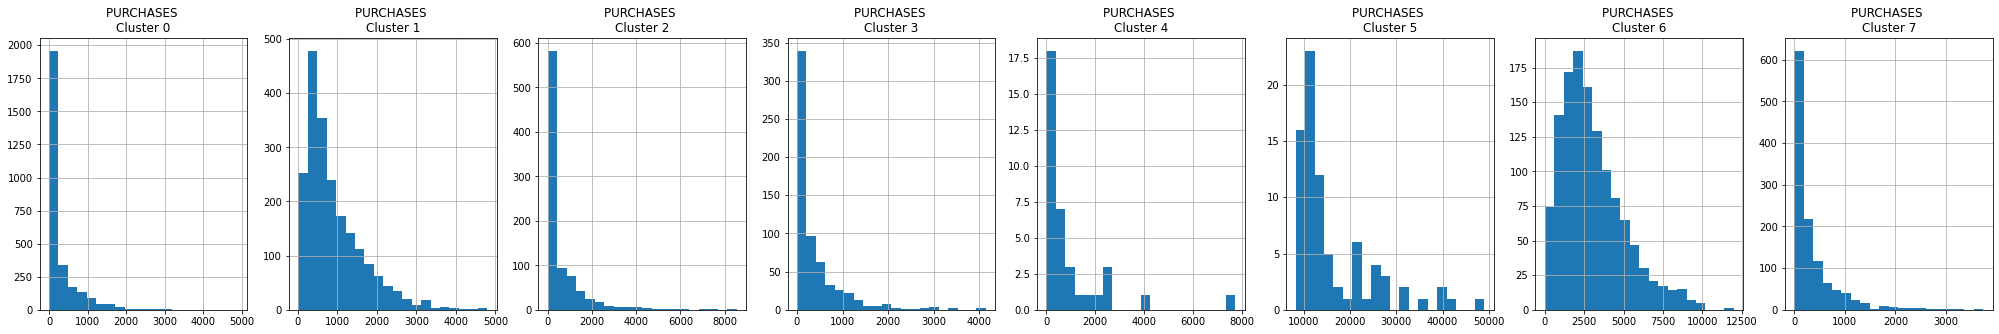

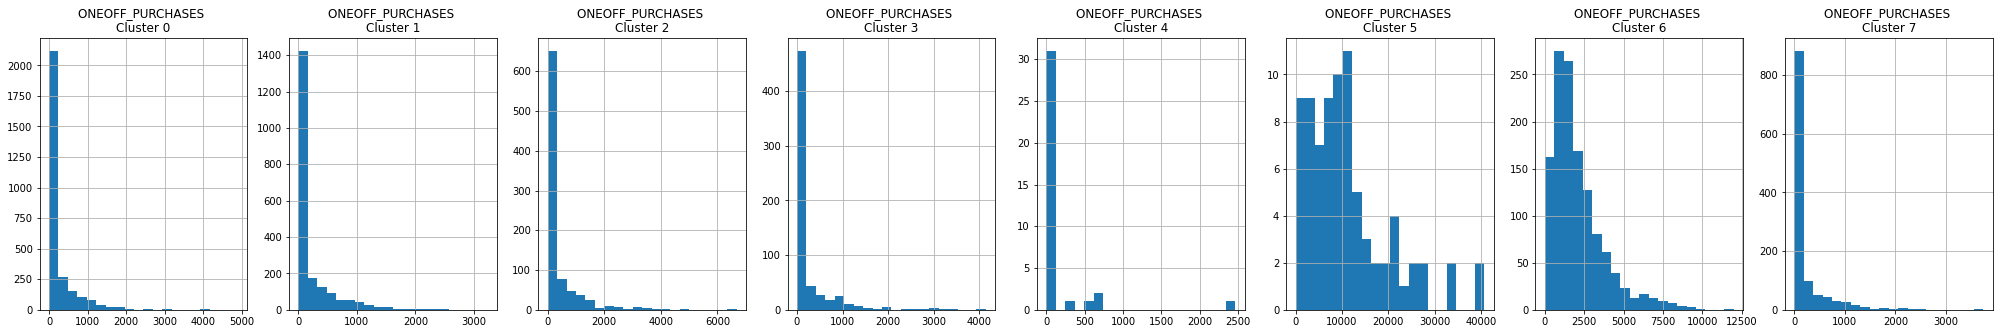

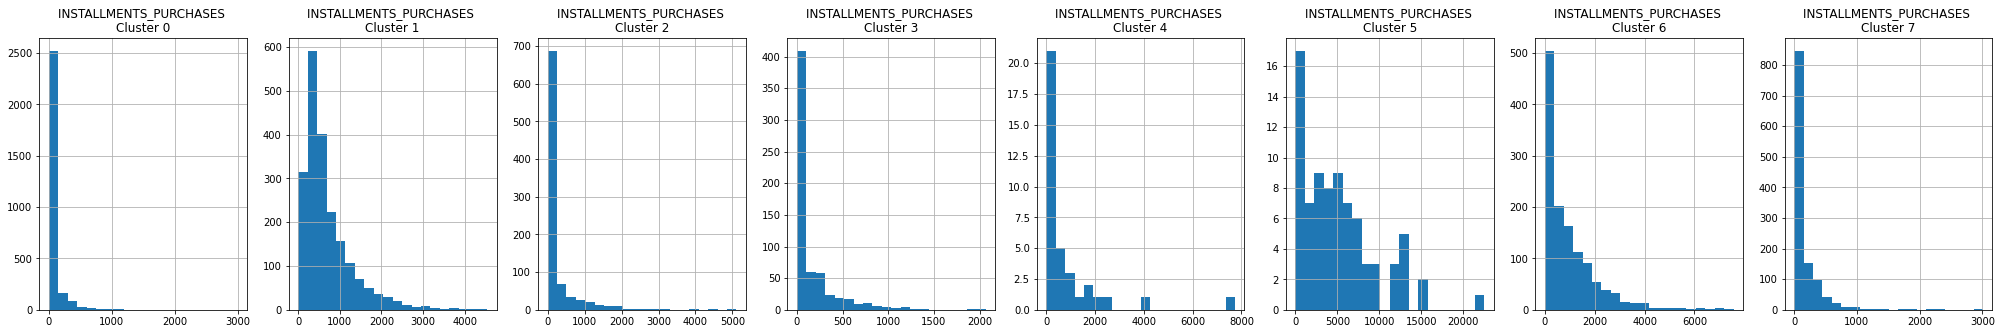

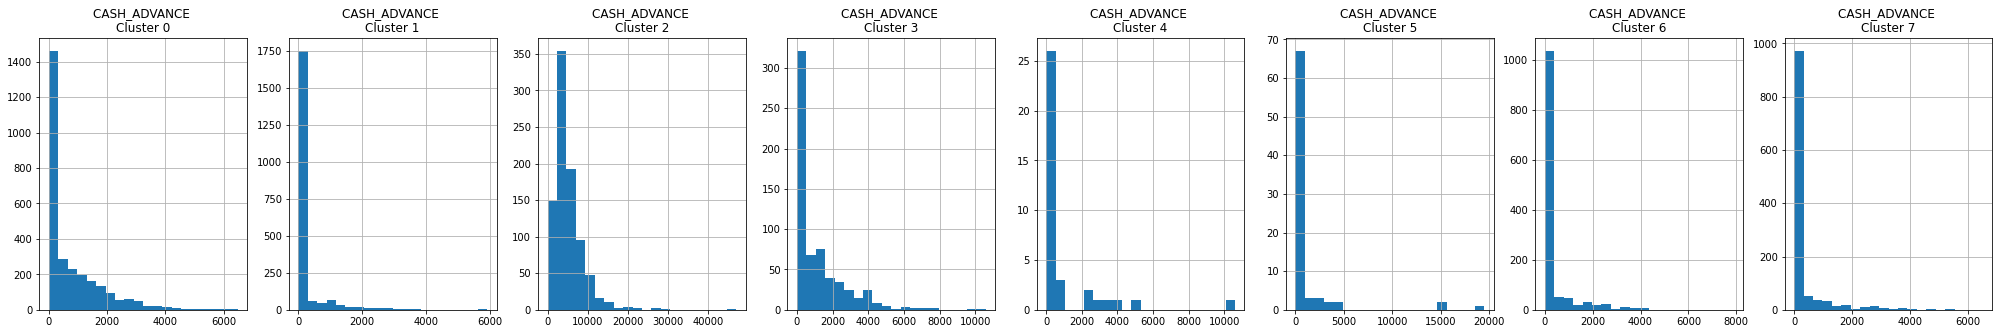

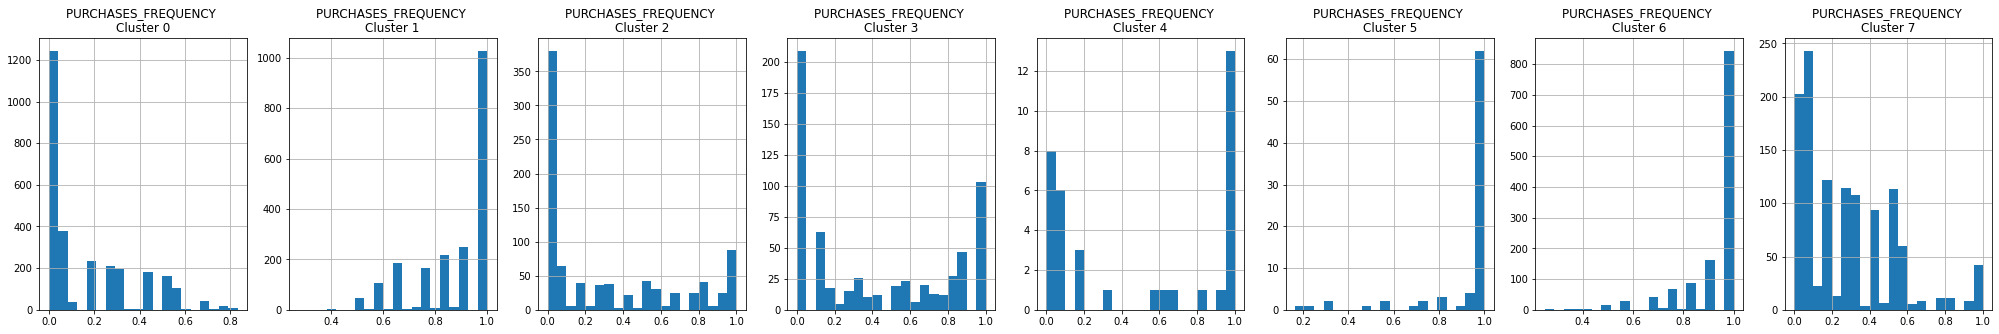

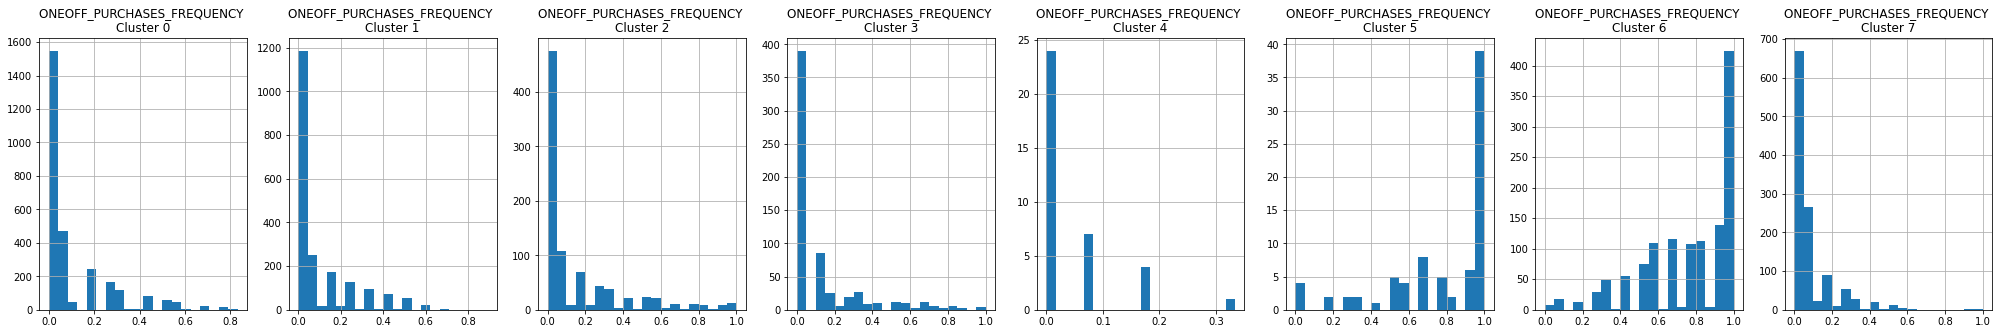

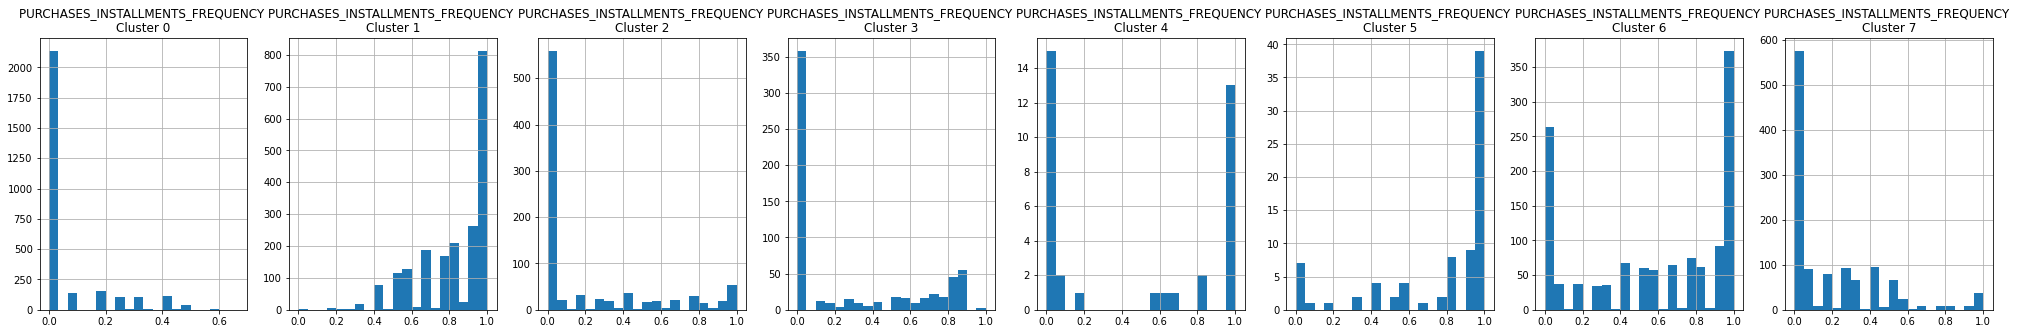

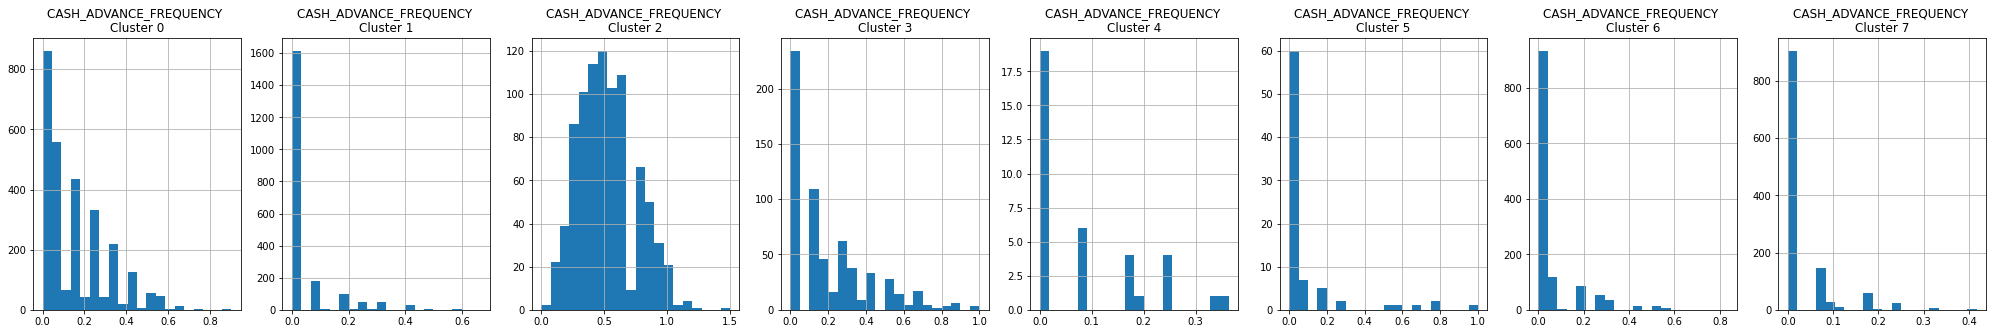

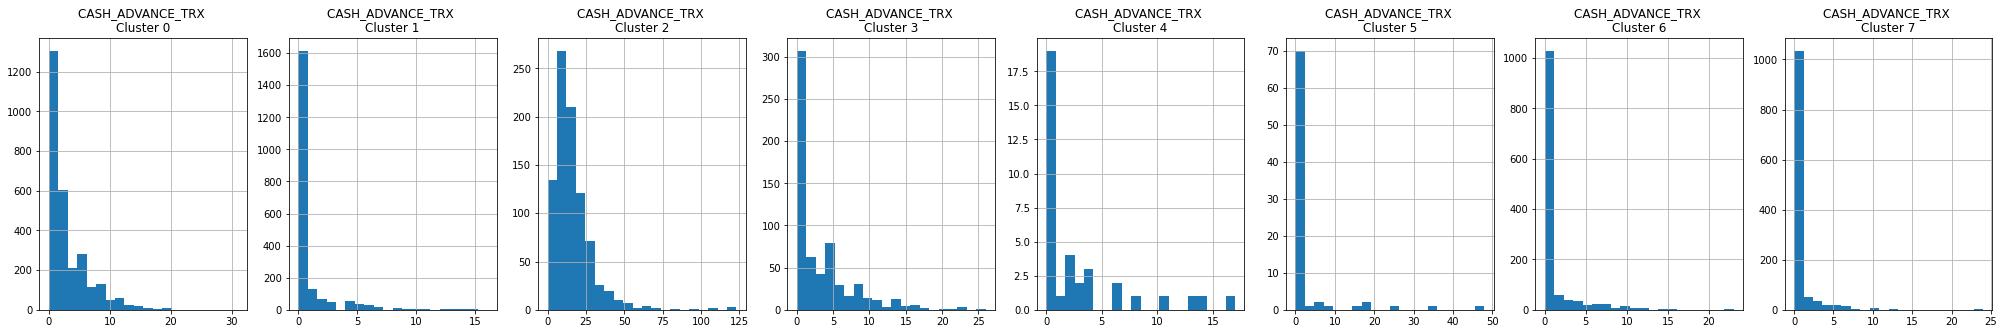

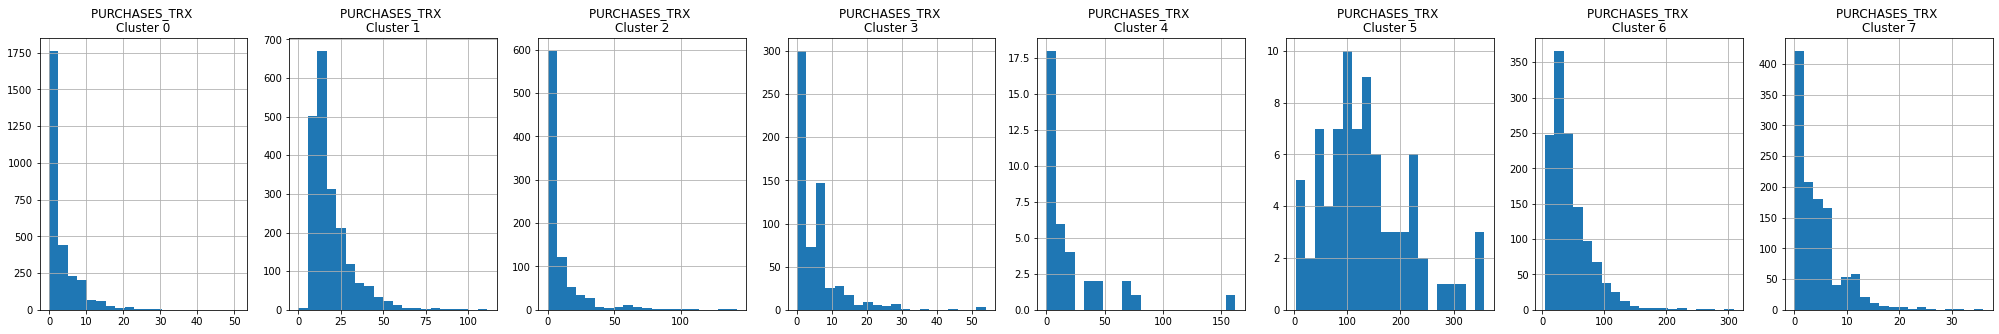

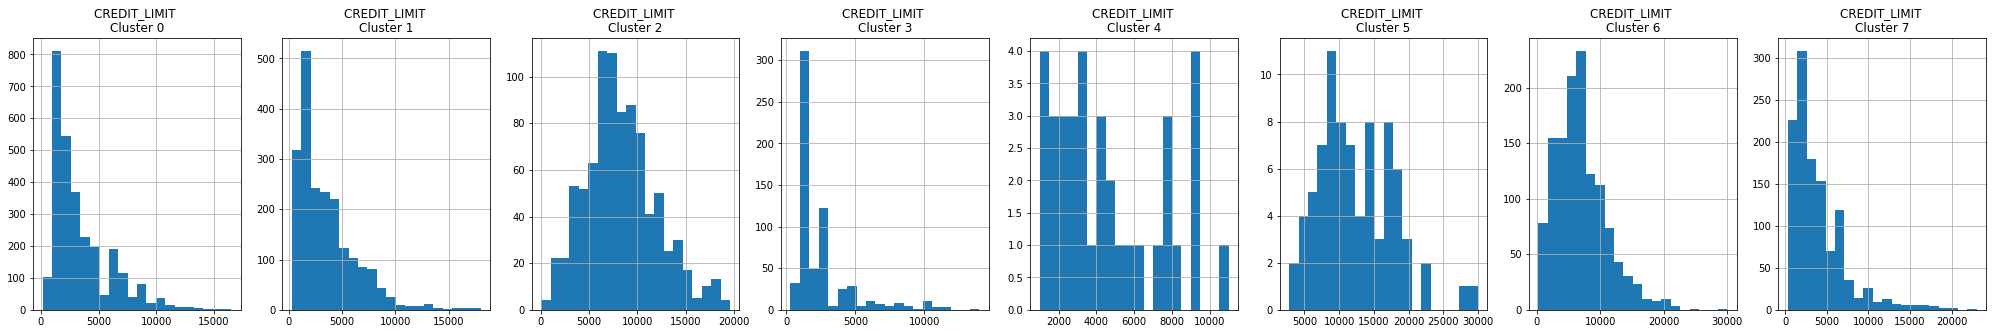

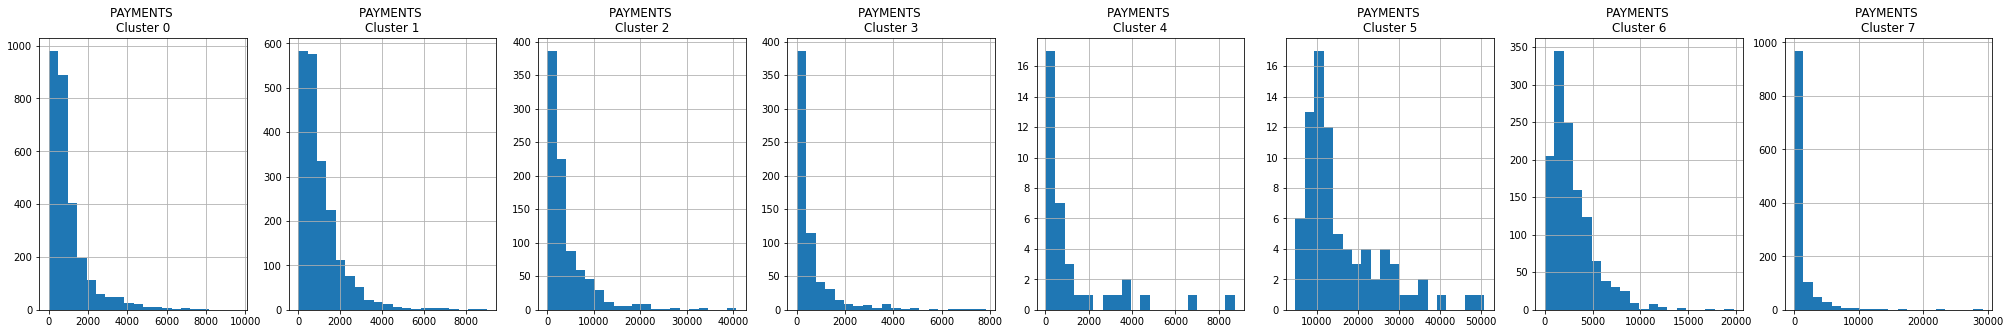

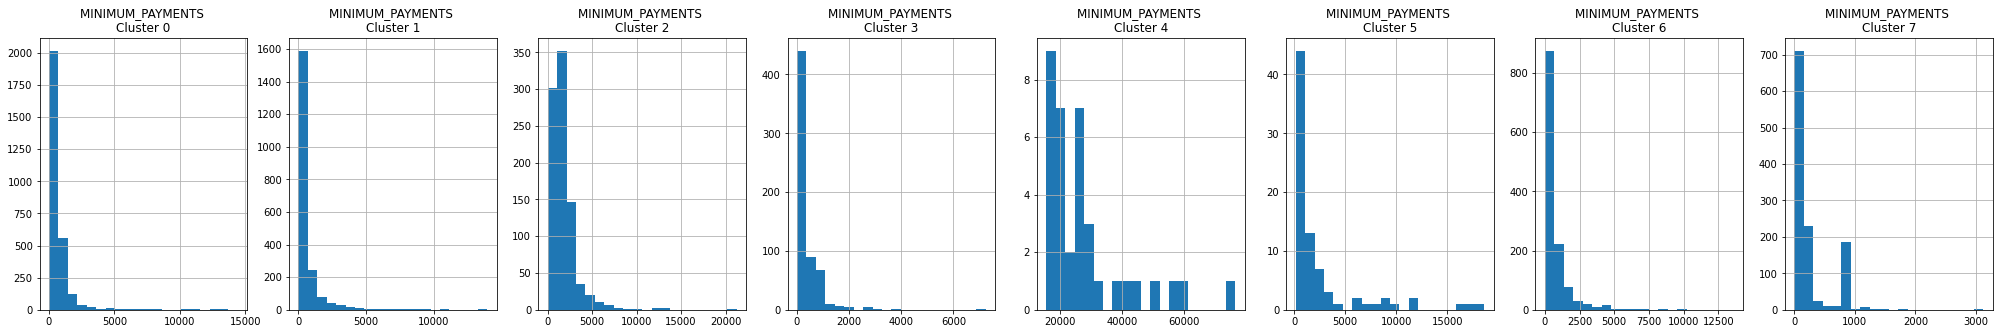

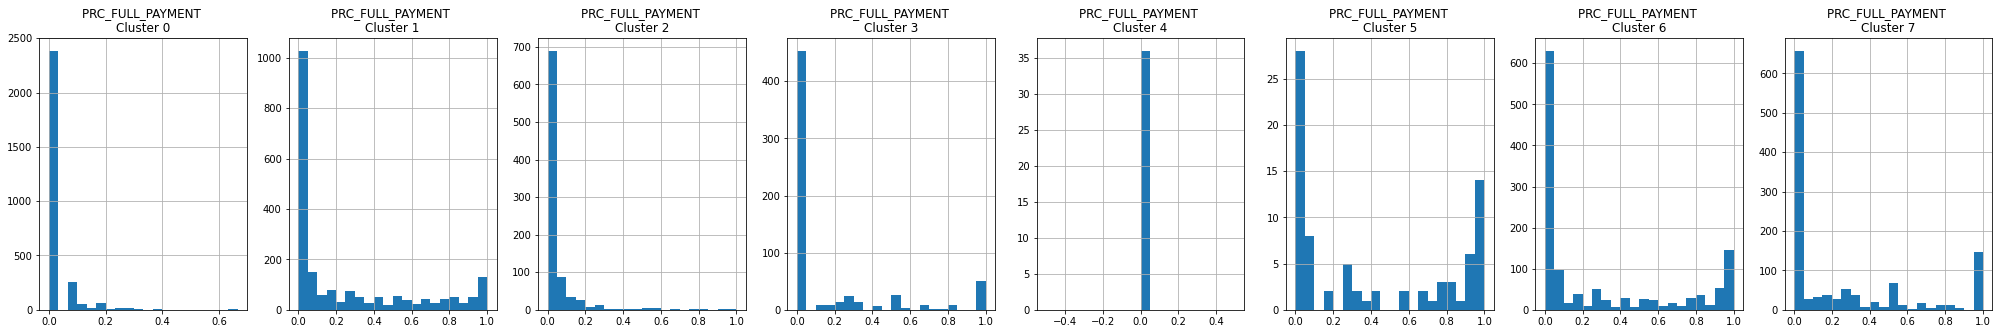

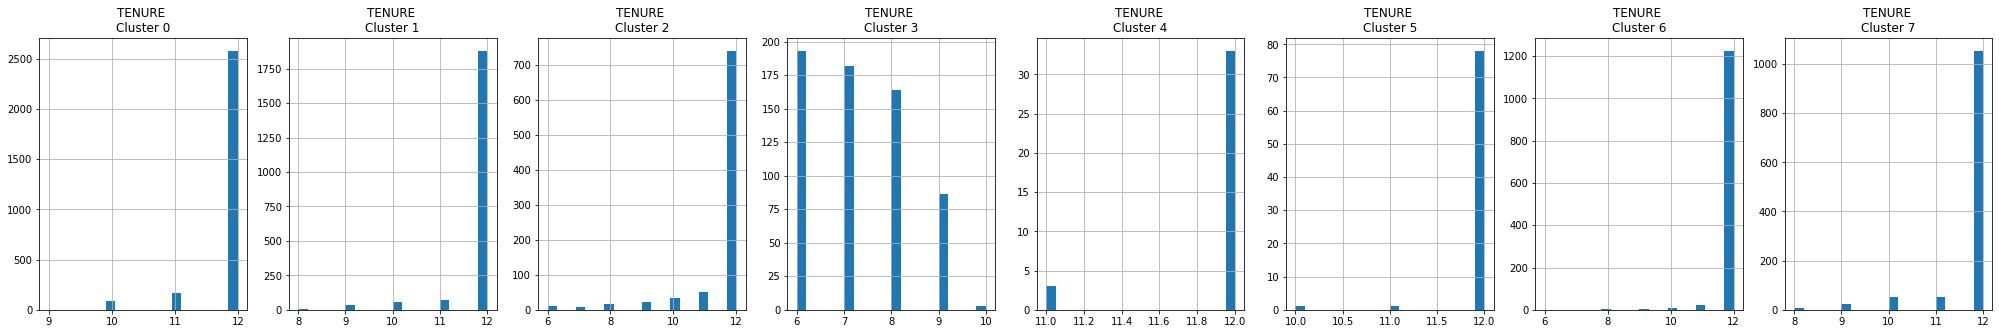

In [48]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35,5));
  for j in range(8):
    plt.subplot(1, 8, j + 1);
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20);
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show();

In [49]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12
4238,0,1116.944017,1.000000,182.64,182.64,0.0,109.600359,0.333333,0.333333,0.000000,0.083333,1,4,1500.0,304.822958,347.685591,0.0,12
4242,0,1868.523786,1.000000,27.89,27.89,0.0,47.998873,0.083333,0.083333,0.000000,0.083333,1,2,2000.0,440.707307,517.115912,0.0,12
4243,0,1000.235038,1.000000,79.41,79.41,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,6500.0,868.377193,264.329249,0.0,12
4253,0,1000.931473,1.000000,0.00,0.00,0.0,374.200459,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,304.037261,290.949378,0.0,12


In [50]:
credit_ordered.tail()

,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5766,7,18.982650,0.272727,327.37,0.00,327.37,0.0,0.333333,0.000000,0.333333,0.0,0,11,6500.0,1430.996352,137.788624,1.0,12
7769,7,22.353780,0.181818,284.50,284.50,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,2,1000.0,1578.650857,86.173877,0.0,12
920,7,39.798993,0.454545,20.09,20.09,0.00,0.0,0.333333,0.333333,0.000000,0.0,0,5,3200.0,0.000000,864.206542,0.0,12
7781,7,4.448015,0.272727,71.81,0.00,71.81,0.0,0.250000,0.000000,0.250000,0.0,0,3,3000.0,257.226631,130.382506,1.0,12
4281,7,2.872146,0.181818,37.00,37.00,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,3000.0,213.066673,82.249496,0.0,12


In [51]:
credit_ordered.to_csv('cluster.csv')